<a href="https://colab.research.google.com/github/AmanAgrawal21900/Colab-Notebooks/blob/main/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading dataset
full_data = pd.read_csv('weatherAUS.csv')
#returns first 5 rows 
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
# Size of dataset 114285 Rows and 24 columns
full_data.shape

(114285, 24)

In [ ]:
# info about columns (concise summary)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114285 entries, 0 to 114284
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           114285 non-null  object 
 1   Location       114285 non-null  object 
 2   MinTemp        113721 non-null  float64
 3   MaxTemp        114002 non-null  float64
 4   Rainfall       113001 non-null  float64
 5   Evaporation    64397 non-null   float64
 6   Sunshine       58889 non-null   float64
 7   WindGustDir    105317 non-null  object 
 8   WindGustSpeed  105341 non-null  float64
 9   WindDir9am     105615 non-null  object 
 10  WindDir3pm     110740 non-null  object 
 11  WindSpeed9am   113016 non-null  float64
 12  WindSpeed3pm   111742 non-null  float64
 13  Humidity9am    112656 non-null  float64
 14  Humidity3pm    111571 non-null  float64
 15  Pressure9am    104385 non-null  float64
 16  Pressure3pm    104421 non-null  float64
 17  Cloud9am       71662 non-null

In [ ]:
# RainToday and RainTomorrow are objects but their values are in the form of Yes/no
# For convenience taking Yes and No as 1 and 0 respectively.
#dataframe gets updated 
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0


In [ ]:
# Checking if the dataset is balanced or not if not 
# downsampling the majority or oversampling the minority

# normalizing the column values of RainTomorrow to facilitate in plotting bar graph
normalized_RainTomorrow = full_data.RainTomorrow.value_counts(normalize = True)
normalized_RainTomorrow

0.0    0.770572
1.0    0.229428
Name: RainTomorrow, dtype: float64

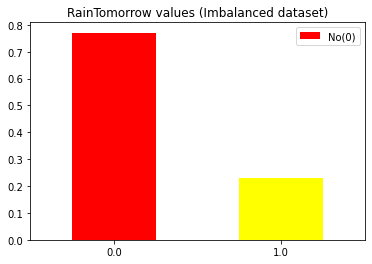

In [ ]:
# Plotting the bar graph to see Imbalance
fig = plt.figure()
normalized_RainTomorrow.plot(kind='bar', color= ['red','yellow'], rot=0)
plt.title('RainTomorrow values (Imbalanced dataset)')
plt.legend(["No(0)", "Yes(1)"])
plt.show()

In [ ]:
# Removing class imbalance
# Will do oversampling of minority class, as dataset is small 
# undersampling of majority class will not render resuls 
# 78:22 ratio of no:yes  

# using sklearn
from sklearn.utils import resample

# separating rows with RainTomorrow as yes and no and setting them to different dataframes
no_RainTomorrow = full_data[full_data.RainTomorrow == 0]
yes_RainTomorrow = full_data[full_data.RainTomorrow == 1]

# Resampling yes_RainTomorrow and concatenating the results into dataframe.
yes_oversampled = resample(yes_RainTomorrow, replace=True, n_samples=len(no_RainTomorrow), random_state=123)
oversampled = pd.concat([no_RainTomorrow, yes_oversampled])


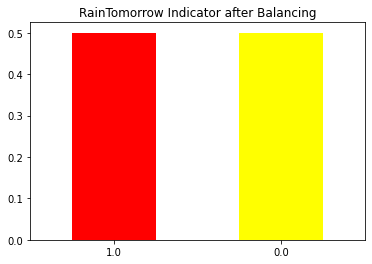

In [ ]:
# Normalizing oversample dataframe for yes and no to plot bar graph
normalized_oversampled = oversampled.RainTomorrow.value_counts(normalize = True)

# Plotting oversampled dataframe
fig = plt.figure()
normalized_oversampled.plot(kind='bar', color= ['red','yellow'], rot=0)
plt.title('RainTomorrow Indicator after Balancing')
plt.show()

In [ ]:
# size of oversampled data
oversampled.shape

(176128, 24)

In [ ]:
# viewig oversampled data
oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0


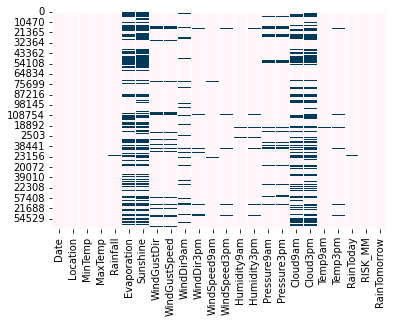

In [ ]:
# checking for missing data in Training data i.e. oversampled
# using heatmap to visualize  

import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

# Evaporation, Sunshine, Cloud9am, Cloud3pm contain a high percentage of null values.

In [ ]:
# Finding the exact portion of missing values from these four columns
# all the null values of dataframe and sorting them
total_missing = oversampled.isnull().sum()
sorted_total_missing = total_missing.sort_values(ascending=False)

total = oversampled.isnull().count()

percent = (total_missing/total).sort_values(ascending=False)
missing = pd.concat([sorted_total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,84824,0.481604
Evaporation,77355,0.439198
Cloud3pm,67160,0.381314
Cloud9am,63730,0.361839


In [ ]:
# above We observe that the above 4 features have less than 50 per cent missing data. 
#So instead of rejecting them completely, we’ll consider them in our model with proper imputation
# selecting columns with datatype objects

oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
# Impute categorical var with Mode

oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])

oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])

oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])

oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])

oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0


In [ ]:
# imputing the categorical columns with mode, and then we will use the label encoder to 
# convert them to numeric numbers. 

# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder

lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Multiple Imputation by Chained Equations (MICE) package.

warnings.filterwarnings("ignore")
multiple_imputed = oversampled.copy(deep=True) 
multiple_imputer = IterativeImputer()
multiple_imputed.iloc[:, :] = multiple_imputer.fit_transform(oversampled)

In [ ]:
#the dataframe has no “NaN” values now. all the NaN values 
multiple_imputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.825546,7.260545,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.828787,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.561914,11.510867,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.733699,2.758997,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.740659,12.418226,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.730331,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.765770,11.957606,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.196214,2.141207,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.991348,5.589234,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


In [ ]:
# Detecting outliers with IQR

Q1 = multiple_imputed.quantile(0.25)
Q3 = multiple_imputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1526.000000
Location           20.000000
MinTemp             9.100000
MaxTemp             9.800000
Rainfall            2.400000
Evaporation         4.074186
Sunshine            5.907632
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       13.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.700000
Pressure3pm         8.700000
Cloud9am            4.000000
Cloud3pm            3.476778
Temp9am             9.100000
Temp3pm             9.400000
RainToday           1.000000
RISK_MM             5.000000
RainTomorrow        1.000000
dtype: float64


In [ ]:
# Removing outliers from the dataset

multiple_imputed = multiple_imputed[~((multiple_imputed < (Q1 - 1.5 * IQR)) |(multiple_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]
multiple_imputed.shape

(126081, 24)

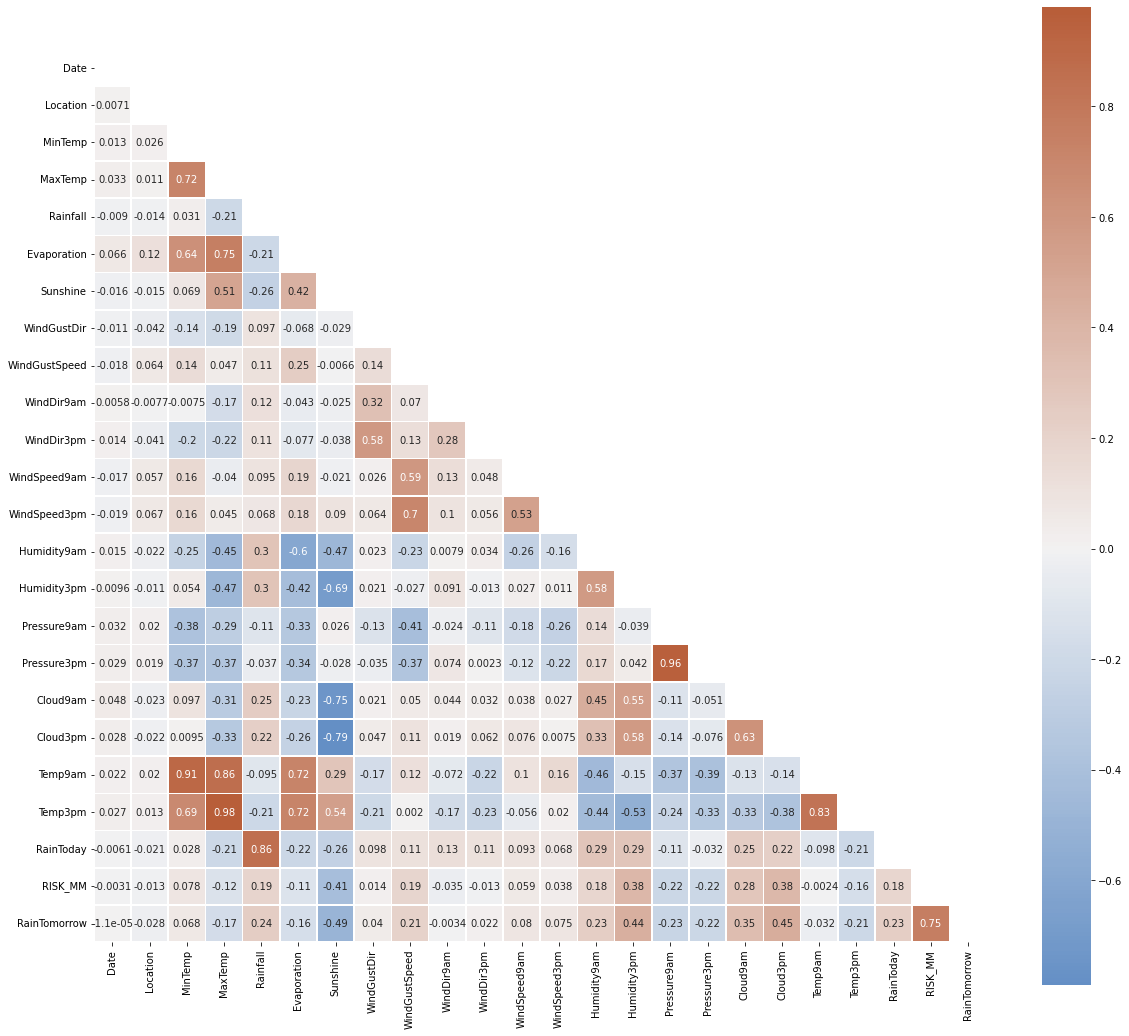

In [ ]:
# checking multicollinearity, that is to say if a character is strongly correlated with another.
# Correlation Heatmap

# correlation
corr = multiple_imputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# The following feature pairs have a strong correlation with each other:
# MaxTemp and MinTemp 0.72
# Pressure9am and pressure3pm 0.96 
# Temp9am and Temp3pm 0.83
# Evaporation and MaxTemp 0.75
# Temp9am and MinTemp 0.91

In [ ]:
# Feature selection for rainfall prediction
# First normalizing using MinMax scaler to avoid negative data

from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
minmax.fit(multiple_imputed)
modified_data = pd.DataFrame(minmax.transform(multiple_imputed), index=multiple_imputed.index, columns=multiple_imputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.052632,0.555233,0.524297,0.434196,0.571495,0.490377,0.866667,0.521127,0.866667,0.933333,0.557279,0.545455,0.546890,0.212121,0.230548,0.279539,0.853842,0.408588,0.515235,0.539894,0.252403,0.000,0.0
1,0.115575,0.052632,0.380814,0.580563,0.371328,0.554754,0.734931,0.933333,0.521127,0.400000,1.000000,0.184461,0.500000,0.239265,0.242424,0.314121,0.299712,0.269931,0.233452,0.523546,0.606383,0.252403,0.000,0.0
2,0.115866,0.052632,0.540698,0.595908,0.371328,0.693105,0.787138,1.000000,0.549296,0.866667,1.000000,0.533977,0.590909,0.170903,0.292929,0.227666,0.325648,0.269617,0.169230,0.628809,0.577128,0.252403,0.000,0.0
3,0.116157,0.052632,0.433140,0.654731,0.371328,0.567699,0.760635,0.266667,0.239437,0.600000,0.000000,0.347568,0.204545,0.250658,0.151515,0.515850,0.443804,0.219846,0.181178,0.548476,0.664894,0.252403,0.080,0.0
4,0.116448,0.052632,0.674419,0.764706,0.476107,0.645524,0.394214,0.866667,0.478873,0.066667,0.466667,0.254364,0.454545,0.672219,0.323232,0.319885,0.247839,0.760659,0.676920,0.540166,0.750000,0.252403,0.016,0.0


In [ ]:
# Selection of features by wrapping method (random forest):
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = multiple_imputed.drop('RainTomorrow', axis=1)
y = multiple_imputed['RainTomorrow']

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)

support = selector.get_support()
features = X.loc[:,support].columns.tolist()

# printing features 
print(features)

# printing all important features
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00250047 0.00259659 0.00315186 0.00431128 0.01010338 0.00303019
 0.06009826 0.00167047 0.00726534 0.00214653 0.00222822 0.00172317
 0.00242566 0.00645013 0.03422166 0.01041137 0.0143337  0.01919839
 0.04800755 0.00337265 0.00540327 0.00427604 0.75107383]


In [ ]:
# Training Rainfall Prediction Model with Different Models
# Dividing the dataset into 75% training data and 25% testing data

features = multiple_imputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = multiple_imputed['RainTomorrow']


# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train: ", X_train)
print("\n\n")
print("X_test: ", X_test)
print("\n\n")
print("y_train: ", y_train)
print("\n\n")
print("y_test: ", y_test)


X_train:  [[ 3.94201488e-01  6.88939275e-01  1.24413317e+00 ...  5.85633047e-01
   1.25337151e+00 -4.71151614e-01]
 [ 1.36863445e+00 -8.42165150e-01 -1.31420101e+00 ... -1.30426377e+00
  -1.32144059e+00  2.15127126e+00]
 [-1.37749480e+00 -2.52723946e-03  4.22365225e-01 ...  3.20384370e-01
   4.26888612e-01 -4.71151614e-01]
 ...
 [-1.37749480e+00  4.74913925e-01  2.62408313e+00 ...  1.18244257e+00
   2.71561048e+00 -4.71151614e-01]
 [ 1.54580408e+00 -5.12895381e-01 -9.26574618e-01 ... -4.58783618e-01
  -1.14660767e+00  2.15127126e+00]
 [ 4.82786302e-01 -2.65943054e-01 -5.54453282e-01 ... -3.26159279e-01
  -5.90321108e-01  2.15127126e+00]]



X_test:  [[-1.46337482 -1.21586641 -0.76456336 ... -1.32899135 -0.69638871
  -0.47390119]
 [-1.02268972  1.86561958  1.39839942 ...  1.87360005  1.48744237
   2.13871539]
 [-1.46337482 -0.69135815 -1.62974847 ... -1.31248314 -1.53510644
   2.13871539]
 ...
 [ 0.74005065 -0.41271314 -0.2392724  ... -0.14040073 -0.23746768
  -0.47390119]
 [-0.9345527 

In [62]:
# function to plot ROC curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [61]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report

# function to run model

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Logistic Regression: 

Accuracy = 0.779385171790235
ROC Area under Curve = 0.7583518378485853
Time taken = 2.2025833129882812
              precision    recall  f1-score   support

         0.0    0.79577   0.85647   0.82500     19139
         1.0    0.74849   0.66023   0.70160     12382

    accuracy                        0.77939     31521
   macro avg    0.77213   0.75835   0.76330     31521
weighted avg    0.77720   0.77939   0.77653     31521



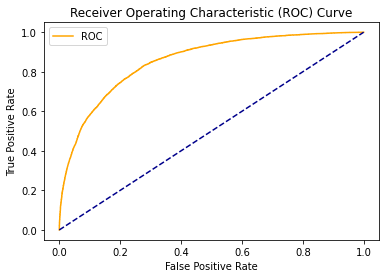

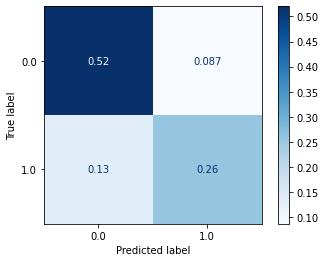

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

print("Logistic Regression: \n")
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Decision Tree: 

Accuracy = 0.8638368072078931
ROC Area under Curve = 0.863850673868292
Time taken = 0.3829681873321533
              precision    recall  f1-score   support

         0.0    0.90750   0.86379   0.88511     19139
         1.0    0.80404   0.86392   0.83291     12382

    accuracy                        0.86384     31521
   macro avg    0.85577   0.86385   0.85901     31521
weighted avg    0.86686   0.86384   0.86460     31521



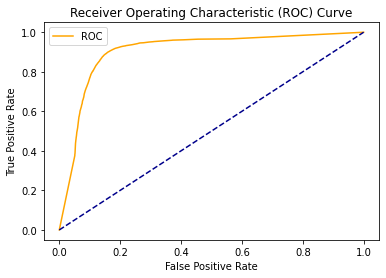

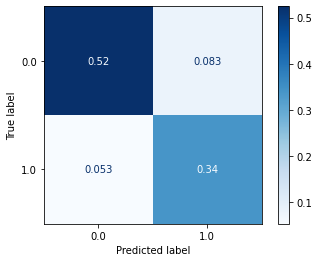

In [66]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree: \n")
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Random Forest: 

Accuracy = 0.9303638843945307
ROC Area under Curve = 0.9294262948034346
Time taken = 23.56908917427063
              precision    recall  f1-score   support

         0.0    0.95064   0.93380   0.94214     19139
         1.0    0.90040   0.92505   0.91256     12382

    accuracy                        0.93036     31521
   macro avg    0.92552   0.92943   0.92735     31521
weighted avg    0.93090   0.93036   0.93052     31521



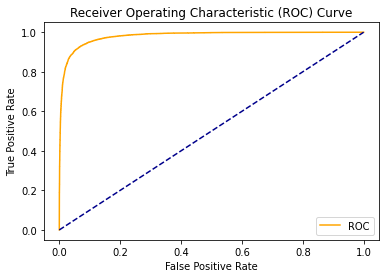

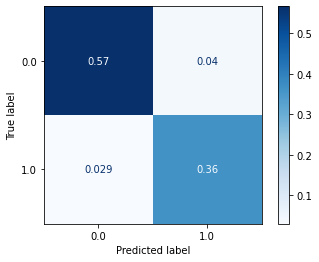

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
print("Random Forest: \n")
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

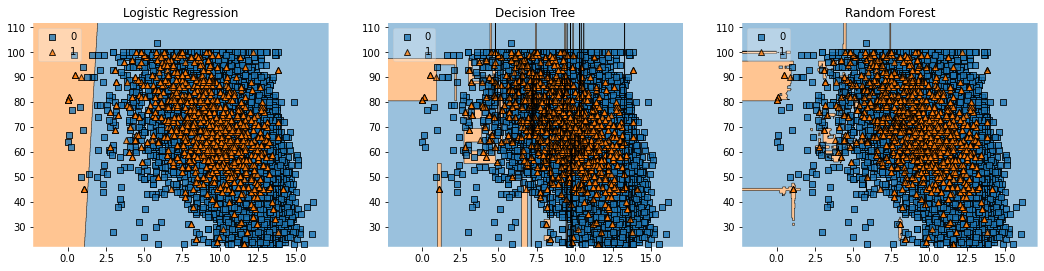

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345) 
clf3 = RandomForestClassifier(random_state=12345)

X_list = multiple_imputed[["Sunshine", "Humidity9am", "Cloud3pm"]] 
X = np.asarray(X_list, dtype=np.float32)
y_list = multiple_imputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for clf, lab, grd in zip([clf1, clf2, clf3], labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, legend=2)
    plt.title(lab)
plt.show()

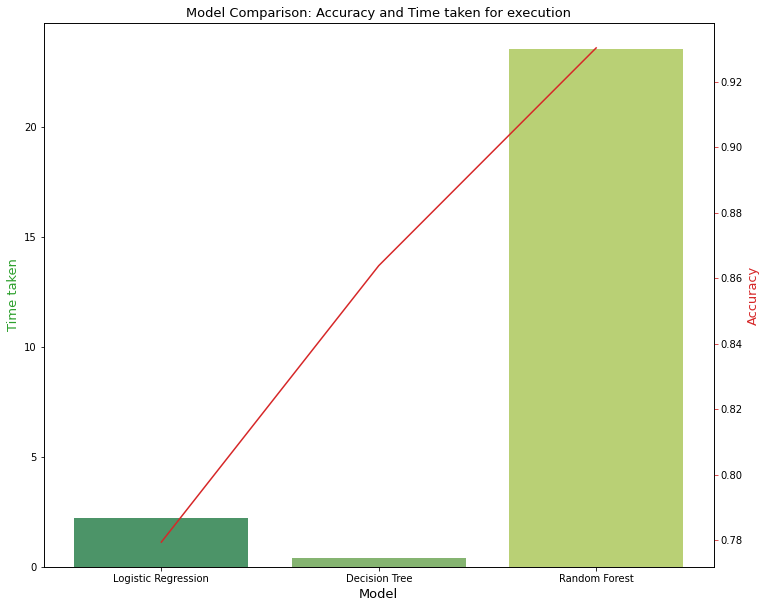

In [72]:
# plotting accuracy and time taken of all three models.

accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf]
tt = [tt_lr, tt_dt, tt_rf]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

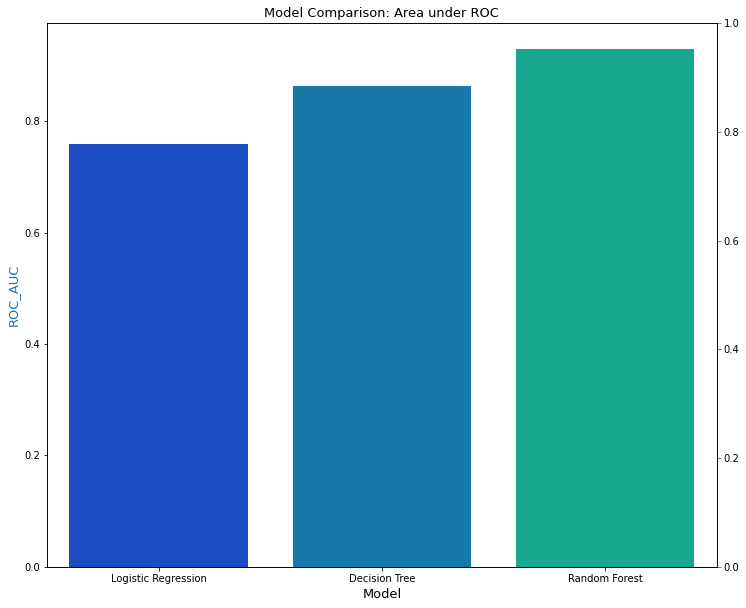

In [75]:
#plotting area under ROC.

fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
ax4.tick_params(axis='y', color=color)
plt.show()

Reference for us only please add more to this about new functions.....

yes_oversampled = resample(yes_RainTomorrow, replace=True, n_samples=len(no_RainTomorrow), random_state=123) 
- https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
- https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4

sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://indianaiproduction.com/seaborn-heatmap/

oversampled.isnull().count()
- https://stackoverflow.com/questions/60249807/python-isnull-sum-vs-isnull-count

print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html